Observation 1: Over the past several days when the data was pulled, Fox News was always the most negative.

Observation 2: Also observed over the past several days, BBC has been the most variable new source, and it is more likely to be observed as positive.  Although, this status might be due to the new royal's birth.

Observation 3: For how negative the liberal news media has been accused of being, the sentiment analysis does not support the claim.

In [1]:
# Dependencies
import tweepy
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
news_outlets = ["@BBCNews", "@CBSNews", "@cnnbrk", "@FoxNews", "@nytimes"]

In [3]:
news_org=[]
text = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
tweet_date = []
time = datetime.now()
time = time.strftime("%Y-%m-%d %H:%M")

for outlet in news_outlets:
    public_tweets = api.user_timeline(outlet, count=100)
    counter = 0
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        tweet_text = (tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        counter += 1
        
        news_org.append(outlet)
        text.append(tweet_text)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweet_number.append(counter)
        tweet_date.append(tweet["created_at"])
        
        print(f'{outlet}: {compound}, {tweet["created_at"]}')

@BBCNews: 0.0, Sat Apr 28 22:23:35 +0000 2018
@BBCNews: 0.0, Sat Apr 28 22:05:08 +0000 2018
@BBCNews: 0.0, Sat Apr 28 21:33:24 +0000 2018
@BBCNews: -0.743, Sat Apr 28 21:19:32 +0000 2018
@BBCNews: 0.6249, Sat Apr 28 20:30:24 +0000 2018
@BBCNews: 0.0, Sat Apr 28 19:36:47 +0000 2018
@BBCNews: 0.4215, Sat Apr 28 16:58:05 +0000 2018
@BBCNews: 0.4404, Sat Apr 28 16:41:37 +0000 2018
@BBCNews: 0.0, Sat Apr 28 16:09:45 +0000 2018
@BBCNews: 0.4215, Sat Apr 28 15:52:23 +0000 2018
@BBCNews: 0.3818, Sat Apr 28 15:30:15 +0000 2018
@BBCNews: 0.0, Sat Apr 28 15:13:16 +0000 2018
@BBCNews: 0.296, Sat Apr 28 15:00:01 +0000 2018
@BBCNews: 0.5707, Sat Apr 28 14:58:37 +0000 2018
@BBCNews: -0.296, Sat Apr 28 14:57:18 +0000 2018
@BBCNews: 0.0, Sat Apr 28 14:20:31 +0000 2018
@BBCNews: 0.0, Sat Apr 28 13:58:33 +0000 2018
@BBCNews: 0.2732, Sat Apr 28 13:36:22 +0000 2018
@BBCNews: -0.4588, Sat Apr 28 13:24:44 +0000 2018
@BBCNews: 0.0, Sat Apr 28 12:51:45 +0000 2018
@BBCNews: 0.0258, Sat Apr 28 12:50:54 +0000 201

@cnnbrk: -0.743, Sat Apr 28 19:13:26 +0000 2018
@cnnbrk: -0.8402, Sat Apr 28 19:05:25 +0000 2018
@cnnbrk: 0.0, Sat Apr 28 05:58:22 +0000 2018
@cnnbrk: 0.0, Sat Apr 28 03:38:25 +0000 2018
@cnnbrk: -0.7276, Sat Apr 28 02:20:55 +0000 2018
@cnnbrk: -0.2263, Fri Apr 27 21:46:40 +0000 2018
@cnnbrk: -0.9186, Fri Apr 27 21:26:55 +0000 2018
@cnnbrk: 0.128, Fri Apr 27 21:15:07 +0000 2018
@cnnbrk: -0.8834, Fri Apr 27 19:26:31 +0000 2018
@cnnbrk: -0.5106, Fri Apr 27 18:24:39 +0000 2018
@cnnbrk: 0.25, Fri Apr 27 17:04:29 +0000 2018
@cnnbrk: -0.7506, Fri Apr 27 15:17:43 +0000 2018
@cnnbrk: 0.4019, Fri Apr 27 14:50:04 +0000 2018
@cnnbrk: 0.0, Fri Apr 27 14:30:14 +0000 2018
@cnnbrk: 0.0, Fri Apr 27 13:08:23 +0000 2018
@cnnbrk: 0.3818, Fri Apr 27 13:06:28 +0000 2018
@cnnbrk: 0.25, Fri Apr 27 11:37:46 +0000 2018
@cnnbrk: 0.0, Fri Apr 27 11:15:01 +0000 2018
@cnnbrk: 0.0, Fri Apr 27 11:14:52 +0000 2018
@cnnbrk: 0.0, Fri Apr 27 10:15:54 +0000 2018
@cnnbrk: -0.7906, Fri Apr 27 09:07:57 +0000 2018
@cnnbrk: -

@nytimes: 0.5267, Sat Apr 28 22:18:05 +0000 2018
@nytimes: 0.0, Sat Apr 28 22:06:17 +0000 2018
@nytimes: 0.0, Sat Apr 28 22:03:00 +0000 2018
@nytimes: 0.0, Sat Apr 28 21:59:02 +0000 2018
@nytimes: 0.0, Sat Apr 28 21:45:08 +0000 2018
@nytimes: 0.25, Sat Apr 28 21:30:09 +0000 2018
@nytimes: 0.0, Sat Apr 28 21:15:07 +0000 2018
@nytimes: -0.6705, Sat Apr 28 20:59:03 +0000 2018
@nytimes: -0.6124, Sat Apr 28 20:45:03 +0000 2018
@nytimes: 0.4404, Sat Apr 28 20:30:11 +0000 2018
@nytimes: -0.3246, Sat Apr 28 20:14:07 +0000 2018
@nytimes: -0.6369, Sat Apr 28 19:59:05 +0000 2018
@nytimes: 0.4404, Sat Apr 28 19:54:58 +0000 2018
@nytimes: -0.5423, Sat Apr 28 19:45:08 +0000 2018
@nytimes: 0.0, Sat Apr 28 19:29:46 +0000 2018
@nytimes: 0.4939, Sat Apr 28 19:14:04 +0000 2018
@nytimes: -0.7519, Sat Apr 28 18:59:02 +0000 2018
@nytimes: 0.0, Sat Apr 28 18:45:09 +0000 2018
@nytimes: 0.0, Sat Apr 28 18:30:05 +0000 2018
@nytimes: 0.3581, Sat Apr 28 18:14:01 +0000 2018
@nytimes: -0.5859, Sat Apr 28 17:59:03 +

In [4]:
news_org_df = pd.DataFrame({"News Org": news_org,
                           "Tweet Number": tweet_number,
                            "Tweet Date": tweet_date,
                            "Tweet": text,
                            "Sentiment Score": compound_list,
                            "Positive Score": positive_list,
                            "Neutral Score": neutral_list,
                            "Negative Score": negative_list
                           })

news_org_df.to_csv("DataSummary.csv", index=False, header=True)

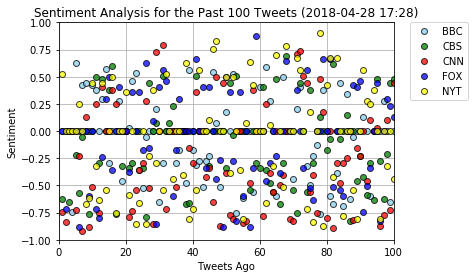

In [43]:
individual_df = news_org_df.loc[news_org_df["News Org"] == "@BBCNews"]
BBC, = plt.plot(individual_df["Tweet Number"],individual_df["Sentiment Score"], label="BBC", marker="o", alpha=0.75, color="skyblue", linestyle='None', markeredgecolor="black")

individual_df = news_org_df.loc[news_org_df["News Org"] == "@CBSNews"]
CBS, = plt.plot(individual_df["Tweet Number"],individual_df["Sentiment Score"], label="CBS", marker="o", alpha=0.75, color="green", linestyle='None', markeredgecolor="black")

individual_df = news_org_df.loc[news_org_df["News Org"] == "@cnnbrk"]
CNN, = plt.plot(individual_df["Tweet Number"],individual_df["Sentiment Score"], label="CNN", marker="o", alpha=0.75, color="red",linestyle='None', markeredgecolor="black")

individual_df = news_org_df.loc[news_org_df["News Org"] == "@FoxNews"]
FOX, = plt.plot(individual_df["Tweet Number"],individual_df["Sentiment Score"], label="FOX", marker="o", alpha=0.75, color="blue",linestyle='None', markeredgecolor="black")

individual_df = news_org_df.loc[news_org_df["News Org"] == "@nytimes"]
NYT, = plt.plot(individual_df["Tweet Number"],individual_df["Sentiment Score"], label="NYT", marker="o", alpha=0.75, color="yellow",linestyle='None', markeredgecolor="black")

plt.title(f"Sentiment Analysis for the Past 100 Tweets ({time})")
plt.xlabel("Tweets Ago")
plt.ylabel("Sentiment")
plt.legend(title="News Source")
plt.xlim(0,100,1)
plt.ylim(-1,1,0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.savefig(f"sentiment.png")
plt.show()

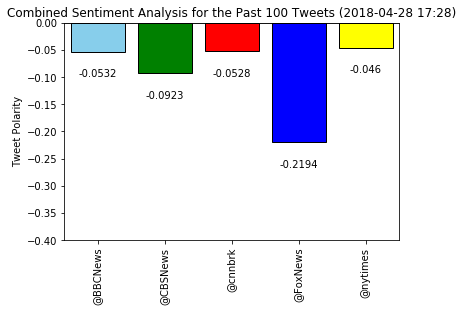

In [42]:
overall_df = news_org_df.groupby(news_org_df["News Org"])
average_score = overall_df["Sentiment Score"].mean()
average_score = average_score.round(4)
color_list = ["skyblue", "green", "red", "blue", "yellow"]
x_axis = np.arange(0,len(news_outlets),1)
overall_df = pd.DataFrame({"Average Composite Score": average_score})

fig, (ax) = plt.subplots()
rects = ax.bar(x_axis,overall_df["Average Composite Score"], color= color_list, edgecolor="black")

plt.title(f"Combined Sentiment Analysis for the Past 100 Tweets ({time})")
plt.xticks(x_axis,news_outlets, rotation='vertical')
plt.ylabel("Tweet Polarity")
plt.ylim(-0.4,0,1)
plt.xlim(-0.5,4.5)
plt.hlines(0, -1, 5, alpha=0.8)

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height - 0.05, height, ha='center', va='bottom')

plt.savefig("tweet_polarity.png")
plt.show()